In [324]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload

import analysis

In [325]:
local_data = pd.read_csv('MapFileData-WithCountyResultsAndCovariates.csv')
national_data = pd.read_csv('national_data.csv')

before = 'm.RR_{}_Armed_Versus_Unarmed'
after = 'm.RR_{}_Unarmed_Versus_Armed'

# Create one more column for simplicity with inverse ratios
for r in ['Black', 'White', 'Hispanic']:
    local_data[after.format(r)] = 1. / local_data[before.format(r)]
    national_data[after.format(r)] = 1. / national_data[before.format(r)]

In [326]:
county = 'Alameda'
local_data.loc[local_data['county'] == county][national_data.columns]

,m.RR_Black_Armed_Versus_Unarmed,m.RR_White_Armed_Versus_Unarmed,m.RR_Hispanic_Armed_Versus_Unarmed,m.RR_Black_Armed_Versus_White_Armed,m.RR_Hispanic_Armed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_White_Unarmed,m.RR_Hispanic_Unarmed_Versus_White_Unarmed,m.RR_Black_Unarmed_Versus_White_Armed,m.RR_Hispanic_Unarmed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_Armed,m.RR_White_Unarmed_Versus_Armed,m.RR_Hispanic_Unarmed_Versus_Armed
209,4.407764,2.115937,2.747014,5.710263,1.529958,2.474265,1.133655,1.264092,0.517964,0.226872,0.472604,0.364032


In [327]:
national_data

,m.RR_Black_Armed_Versus_Unarmed,m.RR_White_Armed_Versus_Unarmed,m.RR_Hispanic_Armed_Versus_Unarmed,m.RR_Black_Armed_Versus_White_Armed,m.RR_Hispanic_Armed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_White_Unarmed,m.RR_Hispanic_Unarmed_Versus_White_Unarmed,m.RR_Black_Unarmed_Versus_White_Armed,m.RR_Hispanic_Unarmed_Versus_White_Armed,m.RR_Black_Unarmed_Versus_Armed,m.RR_White_Unarmed_Versus_Armed,m.RR_Hispanic_Unarmed_Versus_Armed
0,2.79,3.33,3.08,2.94,1.57,3.49,1.67,1.04,0.52,0.358423,0.3003,0.324675


# Unarmed vs. Unarmed

In [328]:
features = ['m.RR_Black_Unarmed_Versus_White_Unarmed', 'm.RR_Hispanic_Unarmed_Versus_White_Unarmed']

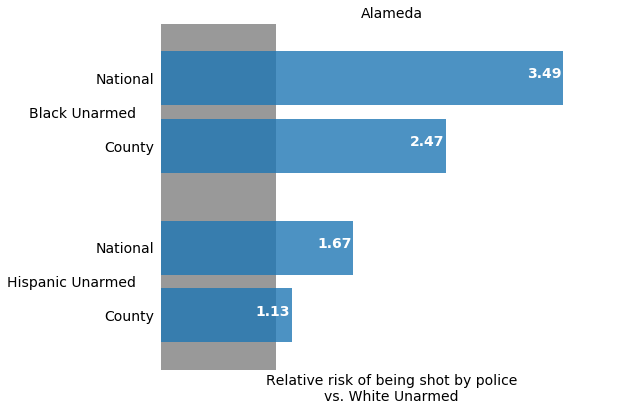

In [329]:
reload(analysis)
plt.close()
max_ratio = analysis.get_max_ratio(national_data, local_data, county, features)
height = 2 * len(features) + len(features) // 2 + 1
f = plt.figure(figsize=(2 * np.ceil(max_ratio), height))
ax = f.add_axes([.2, .2, .8, .8])

analysis.make_barplot(national_data, local_data, county, features, np.ceil(max_ratio), ax)
plt.savefig('{}_{}.png'.format(county, 'U-U'), dpi=300)

# Armed vs. Armed

In [330]:
features = ['m.RR_Black_Armed_Versus_White_Armed', 'm.RR_Hispanic_Armed_Versus_White_Armed']

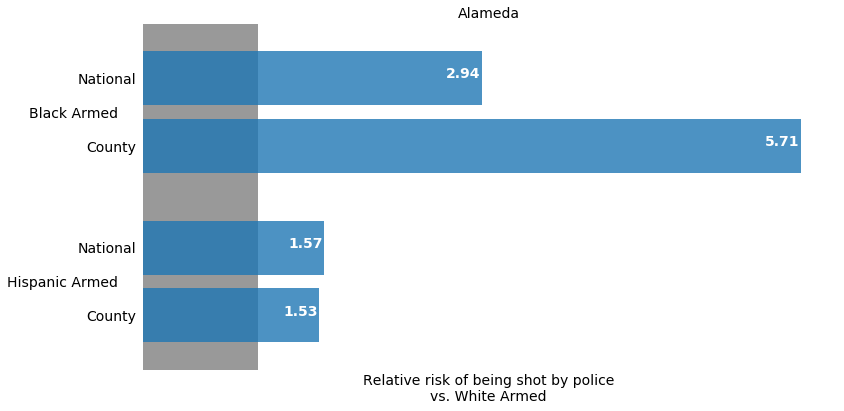

In [331]:
reload(analysis)
plt.close()
max_ratio = analysis.get_max_ratio(national_data, local_data, county, features)
height = 2 * len(features) + len(features) // 2 + 1
f = plt.figure(figsize=(2 * np.ceil(max_ratio), height))
ax = f.add_axes([.2, .2, .8, .8])

analysis.make_barplot(national_data, local_data, county, features, np.ceil(max_ratio), ax)
plt.savefig('{}_{}.png'.format(county, 'A-A'), dpi=300)

# Unarmed vs. Armed

In [332]:
features = ['m.RR_Black_Unarmed_Versus_White_Armed',
            'm.RR_Hispanic_Unarmed_Versus_White_Armed',
            'm.RR_White_Unarmed_Versus_Armed']

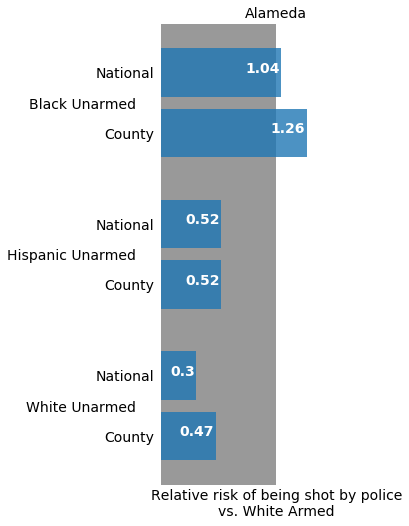

In [333]:
reload(analysis)
plt.close()
max_ratio = analysis.get_max_ratio(national_data, local_data, county, features)
height = 2 * len(features) + len(features) // 2 + 1
f = plt.figure(figsize=(2 * np.ceil(max_ratio), height))
ax = f.add_axes([.2, .2, .8, .8])

analysis.make_barplot(national_data, local_data, county, features, np.ceil(max_ratio), ax)
plt.savefig('{}_{}.png'.format(county, 'U-A'), dpi=300)